The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


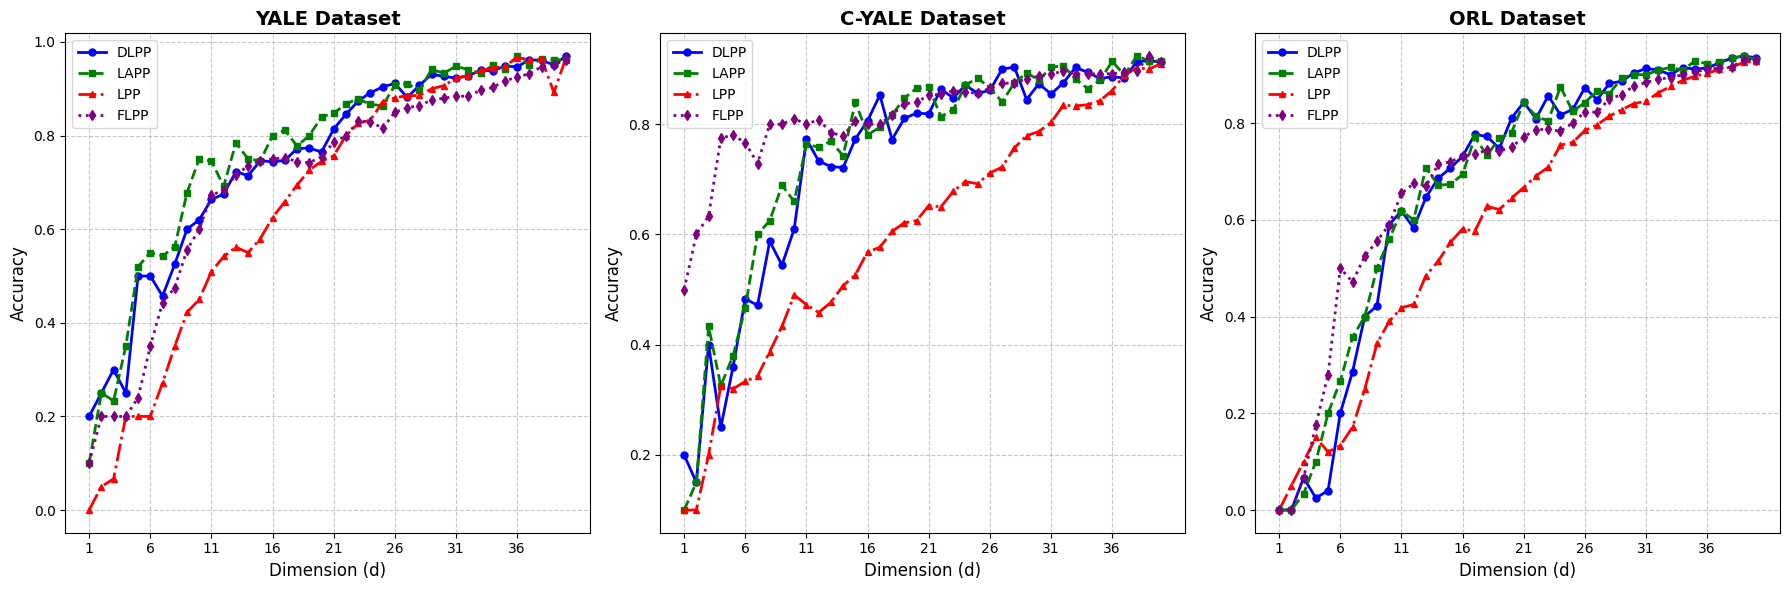

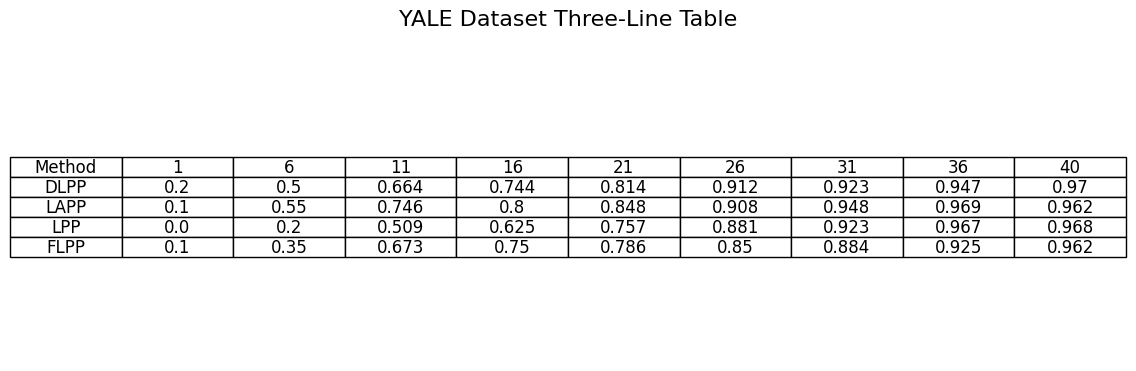

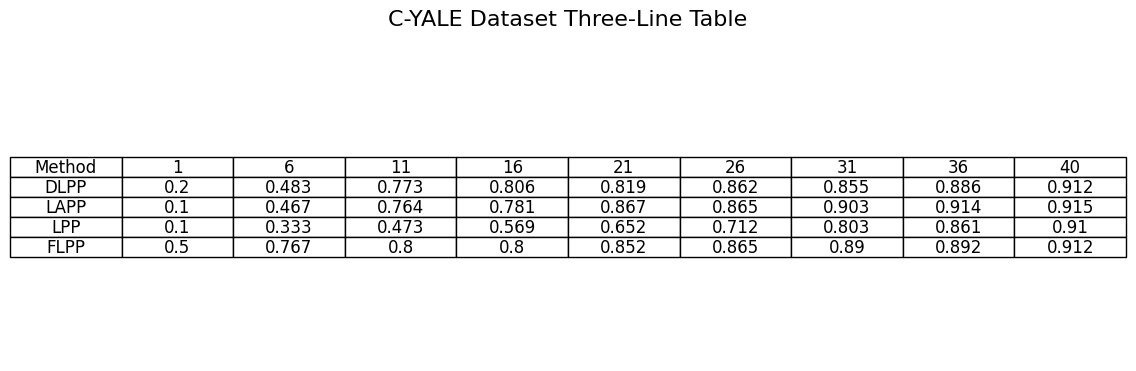

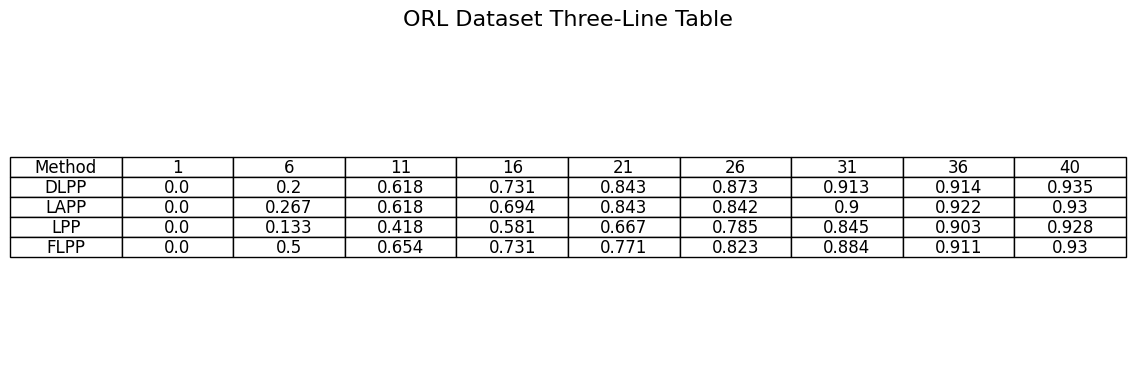

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

###############################折线图#######################################
# 文件名列表
file_names = ["YALE_p=41.xlsx", "C-YALE_p=41.xlsx", "ORL_p=41.xlsx"]
# 每个文件对应的图表标题
titles = ["YALE Dataset", "C-YALE Dataset", "ORL Dataset"]

# 创建一个包含所有数据的字典
data_dict = {}

for file, title in zip(file_names, titles):
    # 读取Excel文件
    df = pd.read_excel(file)
    
    # 将数据存储在字典中
    data_dict[title] = {
        "d": df.iloc[:, 0],
        "DLPP": df.iloc[:, 1],
        "LAPP": df.iloc[:, 2],
        "LPP": df.iloc[:, 3],
        "FLPP": df.iloc[:, 4]
    }

# 创建一个图形和子图
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 定义线条样式和标记
styles = {
    "DLPP": {'color': 'blue', 'marker': 'o', 'linestyle': '-'},
    "LAPP": {'color': 'green', 'marker': 's', 'linestyle': '--'},
    "LPP": {'color': 'red', 'marker': '^', 'linestyle': '-.'},
    "FLPP": {'color': 'purple', 'marker': 'd', 'linestyle': ':'}
}

for ax, title in zip(axs, titles):
    for method, style in styles.items():
        ax.plot(data_dict[title]["d"], data_dict[title][method], label=method,
                color=style['color'], marker=style['marker'], linestyle=style['linestyle'],
                markersize=5, linewidth=2)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Dimension (d)', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xticks(range(1, 41, 5))  # 设置横坐标范围从1到40，间隔为5
    ax.tick_params(axis='both', which='major', labelsize=10)

# 调整布局
plt.tight_layout()
# 保存图像为高分辨率文件
name="comparison_of_DLPP_LAPP_LPP_FLPP"
plt.savefig(f'{name}.png', dpi=300)
plt.savefig(f'{name}.eps', format='eps')
# 显示图像
plt.show()


###############################三线表格#######################################
# 要选择的维度
selected_dims = [1, 6, 11, 16, 21, 26, 31, 36, 40]

# 创建一个包含所有数据的字典
data_dict = {}

for file, title in zip(file_names, titles):
    # 读取Excel文件
    df = pd.read_excel(file)
    
    # 筛选特定的维度
    df_selected = df[df.iloc[:, 0].isin(selected_dims)]
    
    # 将数据存储在字典中
    data_dict[title] = {
        "d": df_selected.iloc[:, 0],
        "DLPP": df_selected.iloc[:, 1],
        "LAPP": df_selected.iloc[:, 2],
        "LPP": df_selected.iloc[:, 3],
        "FLPP": df_selected.iloc[:, 4]
    }

# 四舍五入保留三位小数
for title in titles:
    # 四舍五入处理
    for method in ["DLPP", "LAPP", "LPP", "FLPP"]:
        data_dict[title][method] = data_dict[title][method].round(3)

    # 构建表格数据
    table_data = [["Method"] + selected_dims]  # 第一行为"Method"和选择的维度d
    for method in ["DLPP", "LAPP", "LPP", "FLPP"]:
        row = [method]
        for dim in selected_dims:
            value = data_dict[title][method][data_dict[title]["d"] == dim].values[0]
            row.append(value)
        table_data.append(row)

    # 创建DataFrame以便绘制表格图像
    df_table = pd.DataFrame(table_data[1:], columns=table_data[0])
    
    # 创建表格图像
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')

    # 格式化表格
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)

    # 添加标题
    plt.title(f"{title} Three-Line Table", fontsize=16, pad=20)

    # 保存表格为图像
    plt.savefig(f"{title.replace(' ', '_')}_table.png", dpi=300)
    plt.savefig(f"{title.replace(' ', '_')}_table.eps", format='eps')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


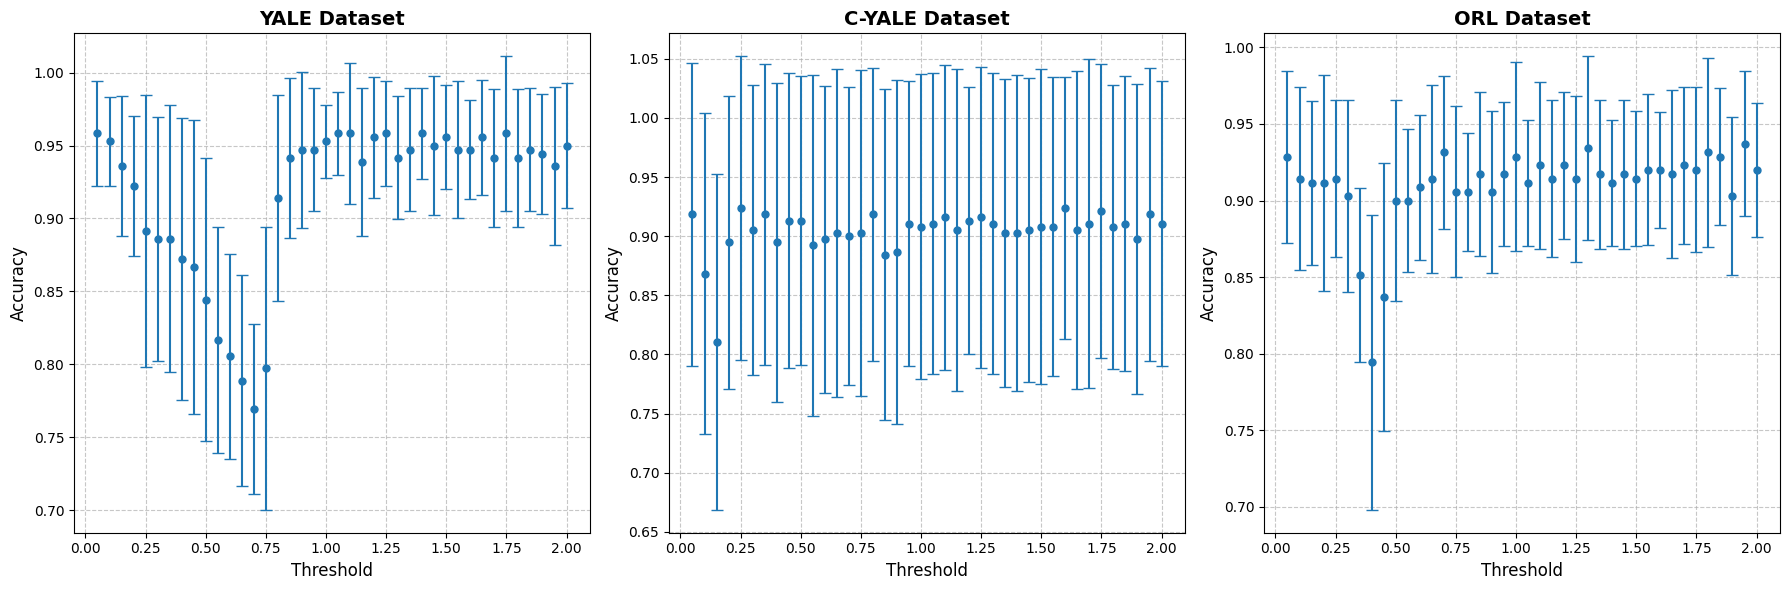

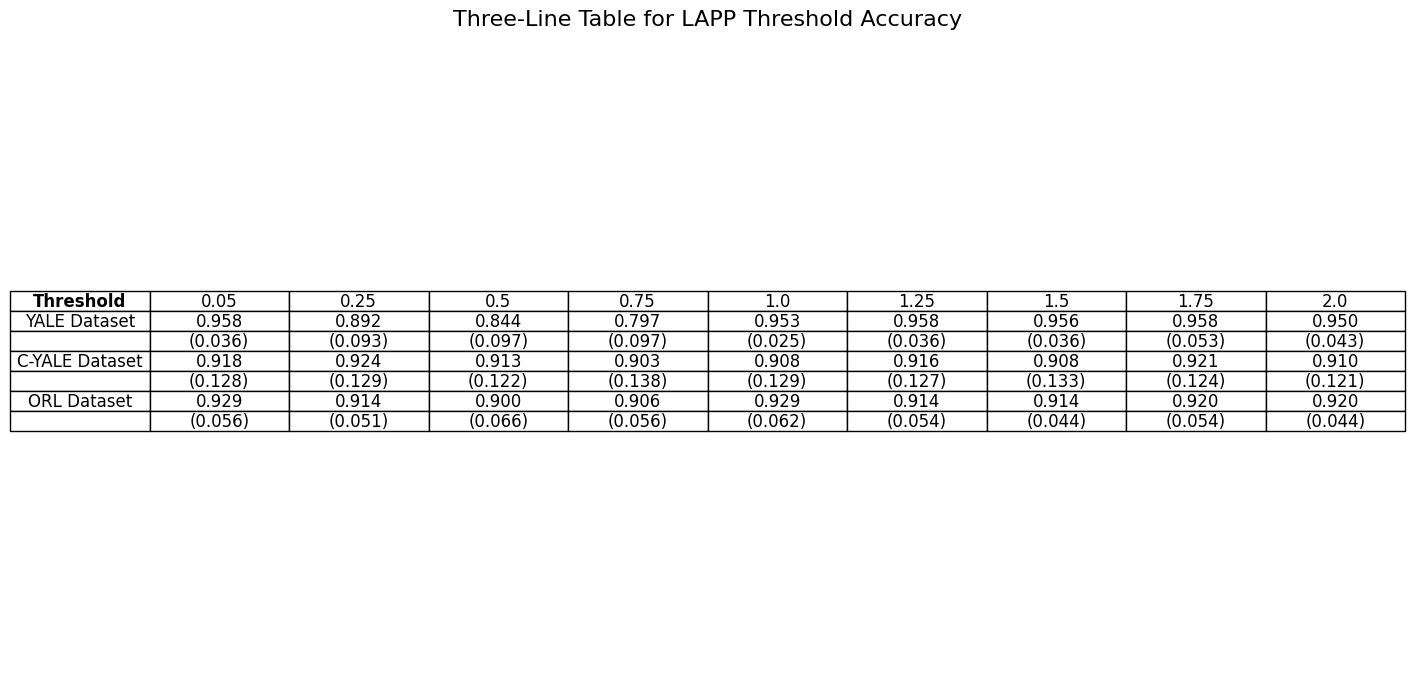

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["LAPP_threshold_YALE.csv", "LAPP_threshold_C-YALE.csv", "LAPP_threshold_ORL.csv"]
# 每个文件对应的数据集名称
titles = ["YALE Dataset", "C-YALE Dataset", "ORL Dataset"]

# 创建一个包含所有数据的字典
data_dict = {}

for file, title in zip(file_names, titles):
    # 读取CSV文件
    df = pd.read_csv(file)
    
    # 将数据存储在字典中
    data_dict[title] = {
        "threshold": df.iloc[:, 0],
        "accuracy": df.iloc[:, 1],
        "std_deviation": df.iloc[:, 2]
    }

# 创建一个图形和子图
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, title in zip(axs, titles):
    # 绘制误差线图
    ax.errorbar(data_dict[title]["threshold"], data_dict[title]["accuracy"], yerr=data_dict[title]["std_deviation"],
                fmt='o', markersize=5, capsize=4)
    #常规形式 ax.plot(data_dict[title]["threshold"], data_dict[title]["accuracy"], marker='o', markersize=5)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Threshold', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

# 调整布局
plt.tight_layout()
plt.savefig("LAPP_threshold_accuracy.png", dpi=300)
plt.savefig("LAPP_threshold_accuracy.eps", format='eps')
# 显示图像
plt.show()









# 指定的阈值
selected_thresholds = [0.05, 0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0]

# 生成三线表格数据
table_data = [["Threshold"] + selected_thresholds]  # 第一行为"Threshold"和选择的阈值
for title in titles:
    row_acc = [title]
    row_var = [""]  # 空的第一个单元格
    for threshold in selected_thresholds:
        # 找到最接近的阈值
        idx = (data_dict[title]["threshold"] - threshold).abs().idxmin()
        # 提取准确率和方差
        accuracy = data_dict[title]["accuracy"][idx]
        std_deviation = data_dict[title]["std_deviation"][idx]
        # 添加准确率和方差到行
        row_acc.append(f"{accuracy:.3f}")
        row_var.append(f"({std_deviation:.3f})")
    table_data.append(row_acc)
    table_data.append(row_var)

# 创建DataFrame以便绘制表格图像
df_table = pd.DataFrame(table_data[1:], columns=table_data[0])

# 生成三线表格数据
table_data = [["Threshold"] + selected_thresholds]  # 第一行为"Threshold"和选择的阈值
for title in titles:
    row_acc = [title]
    row_var = [""]  # 空的第一个单元格
    for threshold in selected_thresholds:
        # 找到最接近的阈值
        idx = (data_dict[title]["threshold"] - threshold).abs().idxmin()
        # 提取准确率和方差
        accuracy = data_dict[title]["accuracy"][idx]
        std_deviation = data_dict[title]["std_deviation"][idx]
        # 添加准确率和方差到行
        row_acc.append(f"{accuracy:.3f}")
        row_var.append(f"({std_deviation:.3f})")
    table_data.append(row_acc)
    table_data.append(row_var)

# 创建DataFrame以便绘制表格图像
df_table = pd.DataFrame(table_data[1:], columns=table_data[0])

# 创建表格图像
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')

# 格式化表格
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# 移动数据集名称向下一个单元格
table[(0, 0)].set_text_props(fontweight='bold')
for i, title in enumerate(titles):
    table[(2 * (i + 1) - 1, 0)].set_text_props(text=title)
    table[(2 * (i + 1), 0)].set_text_props(text='')

"""
# 仅保留三条横线
for (i, j), cell in table.get_celld().items():
    cell.visible_edges = ''
    if i == 0 or i == len(df_table) - 1:
        cell.visible_edges += 'T'
        cell.visible_edges += 'B'
    if i == len(df_table) - 2:
        cell.visible_edges += 'B'
"""
        
# 添加标题
plt.title("Three-Line Table for LAPP Threshold Accuracy", fontsize=16, pad=20)
plt.savefig("LAPP_threshold_accuracy_table.png", dpi=300)
plt.savefig("LAPP_threshold_accuracy_table.eps", format='eps')

# 显示图像
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


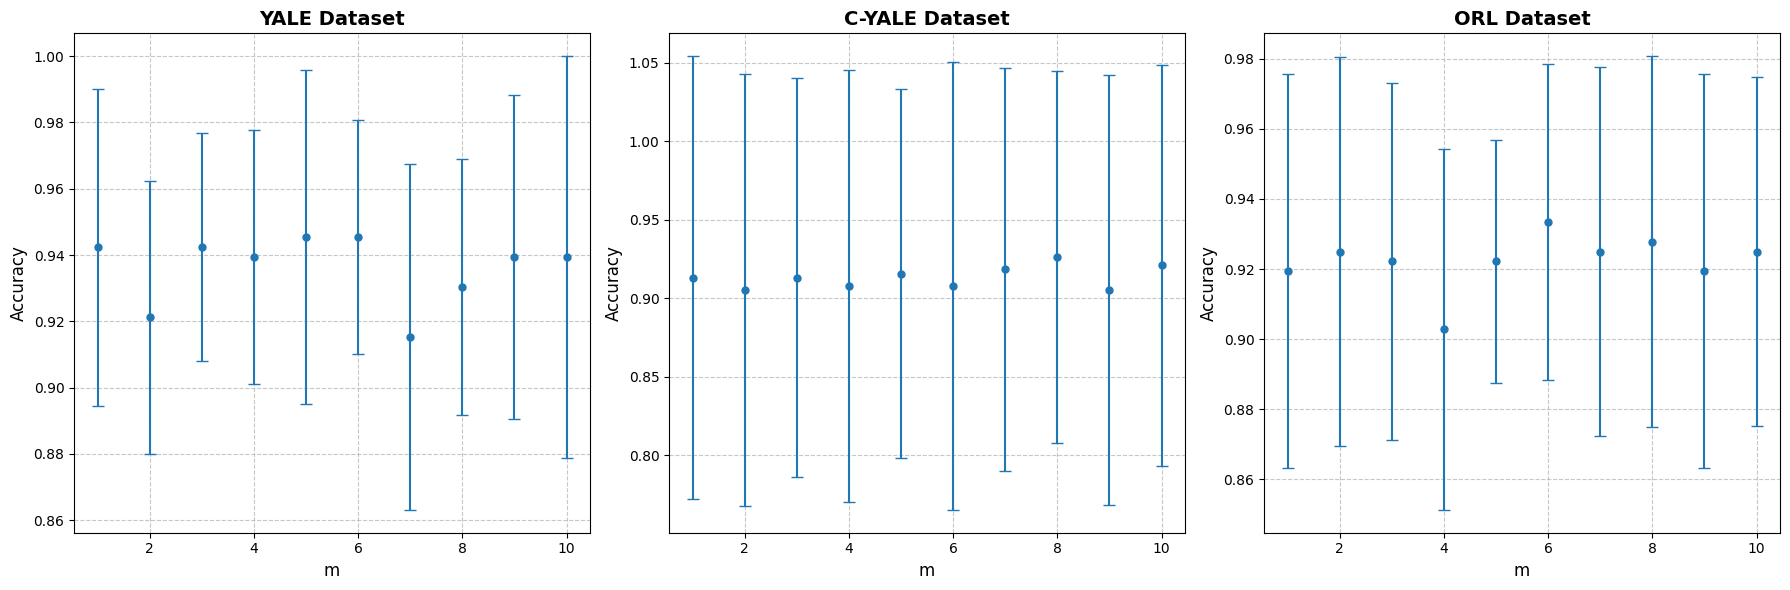

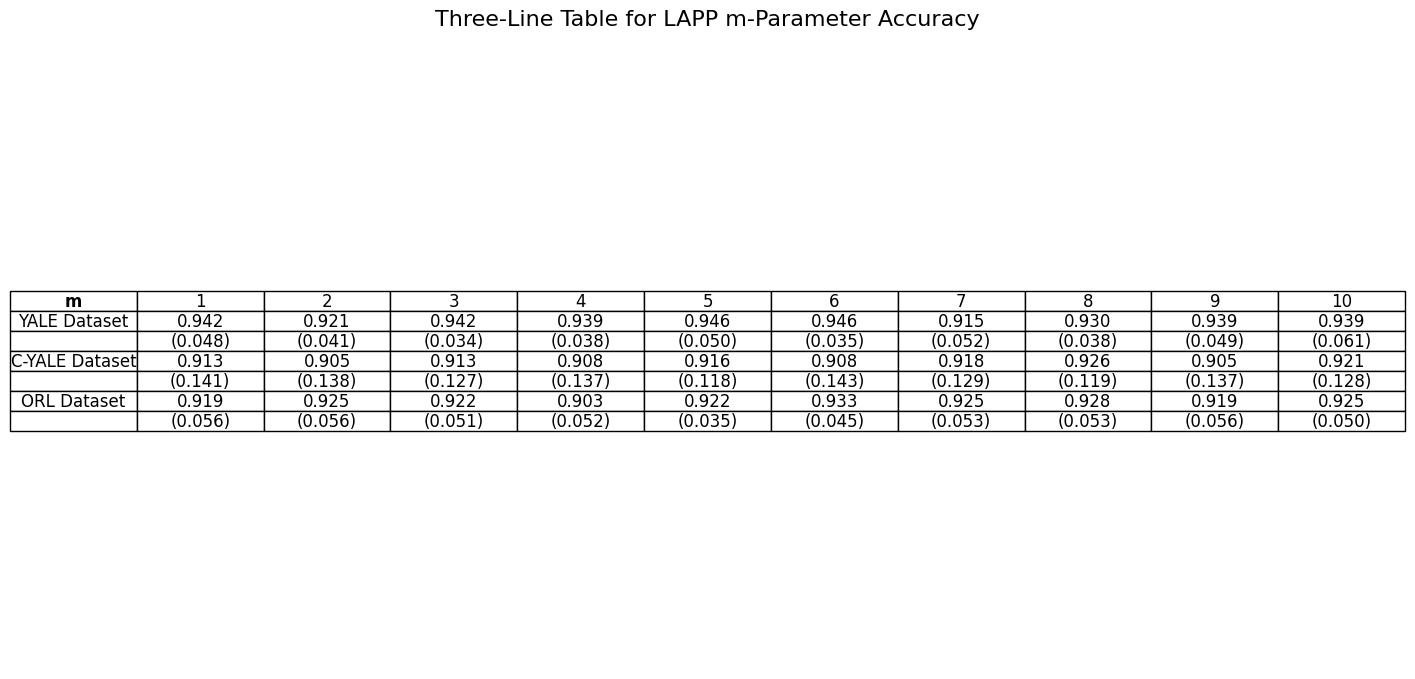

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["LAPP_k_YALE.csv", "LAPP_k_C-YALE.csv", "LAPP_k_ORL.csv"]
# 每个文件对应的数据集名称
titles = ["YALE Dataset", "C-YALE Dataset", "ORL Dataset"]

# 创建一个包含所有数据的字典
data_dict = {}

for file, title in zip(file_names, titles):
    # 读取CSV文件
    df = pd.read_csv(file)
    
    # 将数据存储在字典中
    data_dict[title] = {
        "m": df.iloc[:, 0],
        "accuracy": df.iloc[:, 1],
        "std_deviation": df.iloc[:, 2]
    }

# 创建一个图形和子图
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, title in zip(axs, titles):
    # 绘制误差线图
    ax.errorbar(data_dict[title]["m"], data_dict[title]["accuracy"], yerr=data_dict[title]["std_deviation"],
                fmt='o', markersize=5, capsize=4)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('m', fontsize=12)
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)

# 调整布局
plt.tight_layout()
plt.savefig("LAPP_k_accuracy.png", dpi=300)
plt.savefig("LAPP_k_accuracy.eps", format='eps')
# 显示图像
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# 文件名列表
file_names = ["LAPP_k_YALE.csv", "LAPP_k_C-YALE.csv", "LAPP_k_ORL.csv"]
# 每个文件对应的数据集名称
titles = ["YALE Dataset", "C-YALE Dataset", "ORL Dataset"]

# 创建一个包含所有数据的字典
data_dict = {}

for file, title in zip(file_names, titles):
    # 读取CSV文件
    df = pd.read_csv(file)
    
    # 将数据存储在字典中
    data_dict[title] = {
        "m": df.iloc[:, 0],
        "accuracy": df.iloc[:, 1],
        "std_deviation": df.iloc[:, 2]
    }

# 指定的k值
selected_ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 生成三线表格数据
table_data = [["m"] + selected_ks]  # 第一行为"k"和选择的k值
for title in titles:
    row_acc = [title]
    row_var = [""]  # 空的第一个单元格
    for m in selected_ks:
        # 找到最接近的k值
        idx = (data_dict[title]["m"] - m).abs().idxmin()
        # 提取准确率和方差
        accuracy = data_dict[title]["accuracy"][idx]
        std_deviation = data_dict[title]["std_deviation"][idx]
        # 添加准确率和方差到行
        row_acc.append(f"{accuracy:.3f}")
        row_var.append(f"({std_deviation:.3f})")
    table_data.append(row_acc)
    table_data.append(row_var)

# 创建DataFrame以便绘制表格图像
df_table = pd.DataFrame(table_data[1:], columns=table_data[0])

# 创建表格图像
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')

# 格式化表格
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# 移动数据集名称向下一个单元格
table[(0, 0)].set_text_props(fontweight='bold')
for i, title in enumerate(titles):
    table[(2 * (i + 1) - 1, 0)].set_text_props(text=title)
    table[(2 * (i + 1), 0)].set_text_props(text='')

"""
# 仅保留三条横线
for (i, j), cell in table.get_celld().items():
    cell.visible_edges = ''
    if i == 0 or i == len(df_table) - 1:
        cell.visible_edges = 'TBL'
    if i == 1 or i == len(df_table) - 2:
        cell.visible_edges = 'B'
"""

# 添加标题
plt.title("Three-Line Table for LAPP m-Parameter Accuracy", fontsize=16, pad=20)
plt.savefig("LAPP_k_accuracy_table.png", dpi=300)
plt.savefig("LAPP_k_accuracy_table.eps", format='eps')
# 显示图像
plt.show()
